In [318]:
import math, json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [280]:
n_children = 3
level = 5

child_nodes = [[i for i in range(1, n_children+1)]] * n_children**(level-1)
while len(child_nodes) > 

:
    child_nodes = [child_nodes[i:i + n_children] for i in range(0, len(child_nodes), n_children)]

for child_node in child_nodes:
    print(len(child_node))

3
3
3


In [365]:
# graph = {
#     'root': { 
#         'id': 'root',
#         'depth': 0,
#         'parent': None,
#         'children': [
#             {
#                 'id': 'child_1',
#                 'depth': 1,
#                 'parent': 'root',
#             },
#             {
#                 'id': 'child_2',
#                 'depth': 1,
#                 'parent': 'root',
#             },
#             {
#                 'id': 'child_3',
#                 'depth': 1,
#                 'parent': 'root',
#             }
#         ]
#     },
#     'child_1': { 
#         'id': 'child_1',
#         'depth': 1,
#         'parent': 'root',
#         'children': []
#     },
#     'child_2': { 
#         'id': 'child_2',
#         'depth': 1,
#         'parent': 'root',
#         'children': []
#     },
#     'child_3': { 
#         'id': 'child_3',
#         'depth': 1,
#         'parent': 'root',
#         'children': []
#     }
# }


# graph = {
#     'root': { 
#         'id': 'root',
#         'depth': 0,
#         'parent': None,
#         'children': [
#             {
#                 'id': 'child_1',
#                 'depth': 1,
#                 'parent': 'root',
#             },
#             {
#                 'id': 'child_2',
#                 'depth': 1,
#                 'parent': 'root',
#             }
#         ]
#     },
#     'child_1': { 
#         'id': 'child_1',
#         'depth': 1,
#         'parent': 'root',
#         'children': [
#             {
#                 'id': 'child_1.1',
#                 'depth': 2,
#                 'parent': 'child_1',
#             },
#             {
#                 'id': 'child_1.2',
#                 'depth': 2,
#                 'parent': 'child_1',
#             }
#         ]
#     },
#     'child_2': { 
#         'id': 'child_2',
#         'depth': 1,
#         'parent': 'root',
#         'children': [
#             {
#                 'id': 'child_2.1',
#                 'depth': 2,
#                 'parent': 'child_2',
#             },
#             {
#                 'id': 'child_2.2',
#                 'depth': 2,
#                 'parent': 'child_2',
#             }
#         ]
#     },
#     'child_1.1': { 
#         'id': 'child_1.1',
#         'depth': 2,
#         'parent': 'child_1',
#         'children': [
#             {
#                 'id': 'child_1.1.1',
#                 'depth': 3,
#                 'parent': 'child_1.1',
#             },
#             {
#                 'id': 'child_1.1.2',
#                 'depth': 3,
#                 'parent': 'child_1.1',
#             }
#         ]
#     },
#     'child_1.2': { 
#         'id': 'child_1.2',
#         'depth': 2,
#         'parent': 'child_1',
#         'children': [
#             {
#                 'id': 'child_1.2.1',
#                 'depth': 3,
#                 'parent': 'child_1.2',
#             }
#         ]
#     },
#     'child_2.1': { 
#         'id': 'child_2.1',
#         'depth': 2,
#         'parent': 'child_2',
#         'children': [
#             {
#                 'id': 'child_2.1.1',
#                 'depth': 3,
#                 'parent': 'child_2.1',
#             },
#             {
#                 'id': 'child_2.1.2',
#                 'depth': 3,
#                 'parent': 'child_2.1',
#             },
#             {
#                 'id': 'child_2.1.3',
#                 'depth': 3,
#                 'parent': 'child_2.1',
#             }
#         ]
#     },
#     'child_2.2': { 
#         'id': 'child_2.2',
#         'depth': 2,
#         'parent': 'child_2',
#         'children': []
#     },
#     'child_1.1.1': { 
#         'id': 'child_1.1.1',
#         'depth': 3,
#         'parent': 'child_1.1',
#         'children': []
#     },
#     'child_1.1.2': { 
#         'id': 'child_1.1.2',
#         'depth': 3,
#         'parent': 'child_1.1',
#         'children': []
#     },
#     'child_1.2.1': { 
#         'id': 'child_1.2.1',
#         'depth': 3,
#         'parent': 'child_1.2',
#         'children': []
#     },
#     'child_2.1.1': { 
#         'id': 'child_2.1.1',
#         'depth': 3,
#         'parent': 'child_2.1',
#         'children': []
#     },
#     'child_2.1.2': { 
#         'id': 'child_2.1.2',
#         'depth': 3,
#         'parent': 'child_2.1',
#         'children': []
#     },
#     'child_2.1.3': { 
#         'id': 'child_2.1.3',
#         'depth': 3,
#         'parent': 'child_2.1',
#         'children': []
#     },
# }

graph = {
    'root': {
        'id': 'root',
        'depth': 0,
        'parent': None,
        'children': [] 
    }
}
total_count = 0
n_levels = 5
n_children = 5

def traverse(o, parent_id, level):
    if isinstance(o, list):
        for i, node_id in enumerate(o):
            if isinstance(node_id, list):
                traverse(node_id, f'{parent_id}.{i+1}', level)
            else:
                if parent_id != 'root': 
                    node_id = f'{parent_id}.{node_id}'
                else:
                    node_id = str(node_id)
                
                #print("Node id:", node_id)
                
                new_child_node = {
                    'id': node_id,
                    'depth': level,
                    'parent': parent_id
                }
                
                graph[parent_id]['children'].append(new_child_node)

                new_node = {
                    'id': node_id,
                    'depth': level,
                    'parent': parent_id,
                    'children': []
                }
                graph[node_id] = new_node
            

for level in range(1,n_levels+1):
    level_count = n_children**level

    #print()
    #print("Level", level)

    child_nodes = [[i for i in range(1, n_children+1)]] * n_children**(level-1)
    while len(child_nodes) > n_children:
        child_nodes = [child_nodes[i:i + n_children] for i in range(0, len(child_nodes), n_children)]

    for parent_id, node_ids in enumerate(child_nodes):
        if level == 1: 
            parent_id = 'root'
        else:
            parent_id = f'{parent_id + 1}'

        traverse(node_ids, parent_id, level)
    
    total_count += level_count


print(total_count)

3905


In [366]:
xs, ys, colors, labels = [], [], [], []

def bfs(root):
    visited = []
    queue = []
    leaves = 0

    visited.append(root)
    queue.append(root)

    while queue:
        current_node = queue.pop(0)
        if len(graph[current_node['id']]['children']) == 0: leaves += 1
        # if len(current_node['children']) == 0: leaves += 1

        # for node in current_node['children']:
        for node in graph[current_node['id']]['children']:
            if node not in visited:
                visited.append(graph[node['id']])
                queue.append(graph[node['id']])

    return leaves

def get_coordinates(tree, node, alfa, beta, new_graph, circumference, delta):
    if not node['parent']:
        node['position'] = { 'x': 0, 'y': 0 }
        xs.append(0)
        ys.append(0)
        colors.append('red')
        labels.append(node['id'])
        new_graph.append(node)

    theta = alfa
    root_radius = circumference / (2 * math.pi)
    radius = root_radius + (delta * node['depth'])

    leaf_count = bfs(node)

    for child_node in node['children']:
        lambda_value = bfs(child_node)
        mi = theta + (lambda_value / leaf_count * (beta - alfa))

        x = radius * math.cos((theta + mi) / 2.0)
        xs.append(x)
        y = radius * math.sin((theta + mi) / 2.0)
        ys.append(y)
        if child_node['depth'] == 1: colors.append('pink')
        if child_node['depth'] == 2: colors.append('darkorange')
        if child_node['depth'] == 3: colors.append('orange')
        if child_node['depth'] == 4: colors.append('darkgreen')
        if child_node['depth'] == 5: colors.append('lightgreen')
        if child_node['depth'] == 6: colors.append('pink')
        if child_node['depth'] == 7: colors.append('darkorange')
        if child_node['depth'] == 8: colors.append('orange')
        if child_node['depth'] == 9: colors.append('darkgreen')
        if child_node['depth'] == 10: colors.append('lightgreen')
        labels.append(child_node['id'])

        child_node['position'] = { 'x': x, 'y': y }
        new_graph.append(child_node)

        if len(graph[child_node['id']]['children']) > 0 :
            get_coordinates(tree, graph[child_node['id']], theta, mi, new_graph, circumference, delta)
        
        theta = mi

In [367]:
circumference = 5
delta = 1
new_graph = []
get_coordinates(graph, graph['root'], 0, 2 * math.pi, new_graph, circumference, 1)

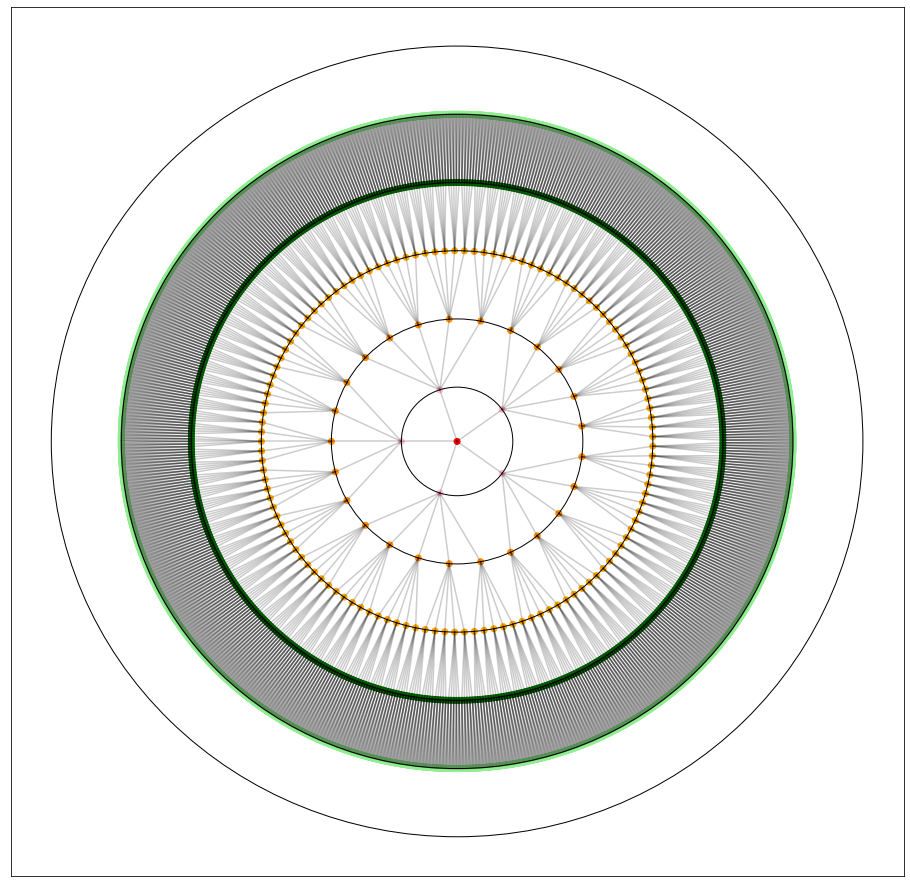

In [368]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(1, 1, 1)

plt.scatter(xs, ys, c=colors)

max_depth = max(new_graph, key=lambda x:x['depth'])['depth'] + 1
root_radius = circumference / (2 * math.pi)
#ax.add_patch(Circle((0,0), radius=root_radius/2, color='red',fill=False))
for level in range(0, max_depth):
    radius = root_radius + (delta * level)
    #ax.add_patch(Circle((0,0), radius=delta*level, color='black',fill=False))
    ax.add_patch(Circle((0,0), radius=radius, color='black',fill=False))
    

# for i, label in enumerate(labels):
#     if label == 'child_1.1.1':
#         plt.text(xs[i]-0.4, ys[i]+0.08, label)
#         continue
#     plt.text(xs[i]+0.1, ys[i], label)

for node in new_graph:
    #print(node)
    if node['id'] == 'root': continue
    
    node_position = node['position']
    parent_position = [n['position'] for n in new_graph if n['id'] == node['parent']][0]

    plt.plot([parent_position['x'], node_position['x']],[parent_position['y'], node_position['y']], 'black', alpha=0.2)

plt.xticks([])
plt.yticks([])
plt.show()